<a href="https://colab.research.google.com/github/jhnnxyz/AI-Mixtape/blob/main/notebooks/fastai/01_chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key = 'XXXXX'
results = search_images_bing(key, 'grizzly bear') 
ims = results.attrgot('contentUrl')
len(ims)

150

In [ ]:
dest = 'images/grizzly.jpg' 
download_url(ims[0], dest)

Path('images/grizzly.jpg')

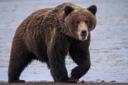

In [ ]:
im = Image.open(dest) 
im.to_thumb(128,128)

In [ ]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#426) [Path('bears/grizzly/00000062.jpg'),Path('bears/grizzly/00000079.jpg'),Path('bears/grizzly/00000035.jpg'),Path('bears/grizzly/00000108.jpg'),Path('bears/grizzly/00000068.jpg'),Path('bears/grizzly/00000133.jpg'),Path('bears/grizzly/00000109.jpg'),Path('bears/grizzly/00000005.jpg'),Path('bears/grizzly/00000050.jpg'),Path('bears/grizzly/00000007.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#5) [Path('bears/grizzly/00000069.jpg'),Path('bears/grizzly/00000100.jpg'),Path('bears/grizzly/00000092.jpg'),Path('bears/black/00000120.jpg'),Path('bears/black/00000055.jpg')]

In [ ]:
failed.map(Path.unlink);

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

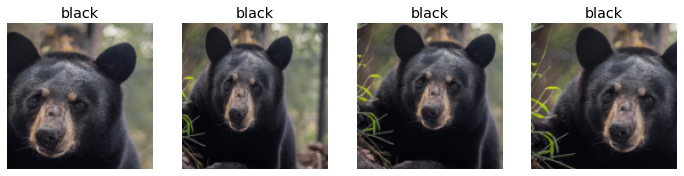

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) 
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

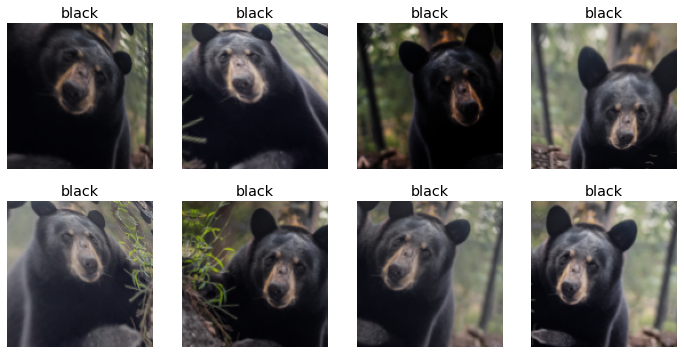

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2)) 
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.399136,0.227743,0.047619,01:39


epoch,train_loss,valid_loss,error_rate,time
0,0.185881,0.180233,0.047619,02:04
1,0.143660,0.148983,0.023810,02:04
2,0.100786,0.159010,0.035714,02:02
3,0.083921,0.138663,0.023810,02:04
4,0.066964,0.116831,0.023810,02:04
5,0.057147,0.102330,0.023810,02:03
6,0.049062,0.088752,0.023810,02:05
7,0.041859,0.075971,0.011905,02:05
8,0.036718,0.069464,0.011905,02:07
9,0.034859,0.066642,0.011905,02:04


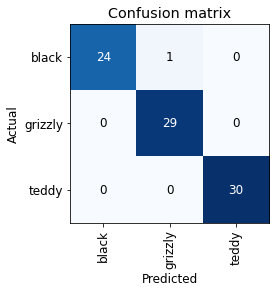

In [ ]:
interp = ClassificationInterpretation.from_learner(learn) 
interp.plot_confusion_matrix()

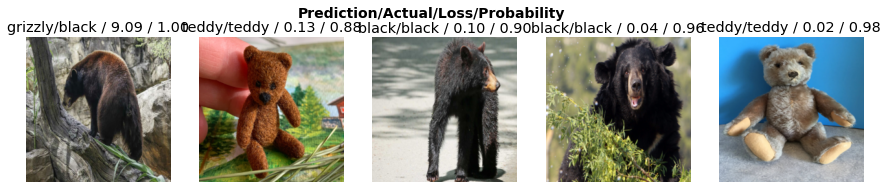

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner


In [21]:
learn.export()

In [22]:
path = Path() 
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [23]:
learn_inf = load_learner(path/'export.pkl')

In [24]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([2.7820e-06, 9.9999e-01, 5.2784e-06]))

In [25]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']